In [22]:
import cv2
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import MNIST
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [23]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [24]:
train_data = MNIST(
    root = '/content/',
    train = True,
    transform = transform,
    download = True
)

In [25]:
batch_size = 64
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)

In [26]:
img, lab = next(iter(train_loader))

In [27]:
print('min = ', torch.min(img[0]).item())
print('max = ', torch.max(img[0]).item())

min =  -1.0
max =  1.0


## CNN

In [45]:
class NNModel(nn.Module):
  def __init__(self):
    super(NNModel, self).__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1, 32, 3, 1),
        nn.ReLU(),

        nn.Conv2d(32, 64, 3, 1),
        nn.ReLU(),

        nn.Conv2d(64, 64, 3, 1),
        nn.ReLU(),
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64, 64, 3, 1),
        nn.ReLU(),

        nn.ConvTranspose2d(64, 32, 3, 1),
        nn.ReLU(),

        nn.ConvTranspose2d(32, 1, 3, 1),
        # nn.Tanh()
    )
  def forward(self, X):
    encode = self.encoder(X)
    decode = self.decoder(encode)
    return decode

In [46]:
model = NNModel()
model.to(device)

NNModel(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 1, kernel_size=(3, 3), stride=(1, 1))
  )
)

In [ ]:
epoches = 5
lr = 0.01
last_ele_idx = len(train_data)//batch_size

criterian = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

In [48]:
def plot(img, epoche = None):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(img.cpu().permute(1, 2, 0), cmap = 'grey')
  ax1.set_title("Original")

  model.eval()
  with torch.no_grad():
    pred = model(img.unsqueeze(0)).reshape(28, 28, 1).detach().cpu()

  ax2.imshow(pred, cmap = 'grey')
  ax2.set_title("Compressed")

  if epoche:
    plt.suptitle(f"Epoche = {epoche}", y = 0.9)
  plt.show()


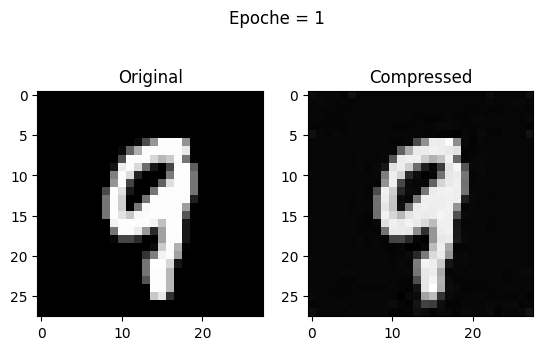


For epoche 1 average loss = 0.20369762562186536



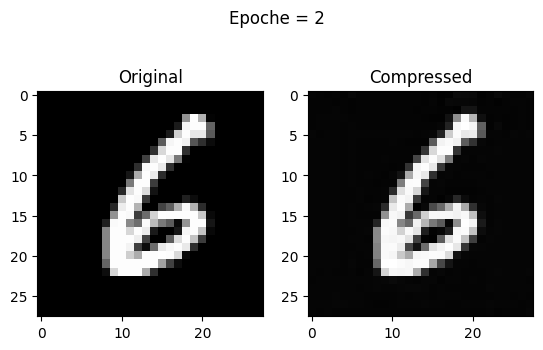


For epoche 2 average loss = 0.001285114525772655



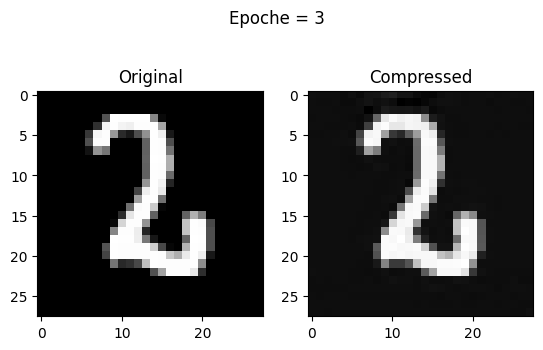


For epoche 3 average loss = 0.002759544238788701



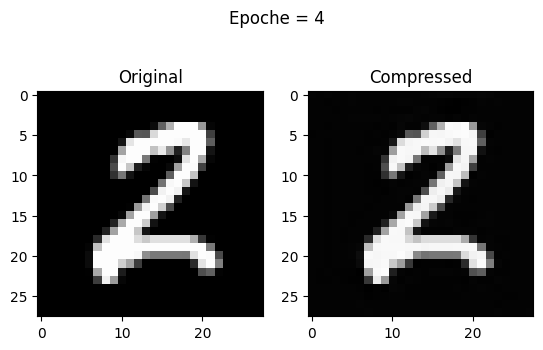


For epoche 4 average loss = 0.0006734732836357075



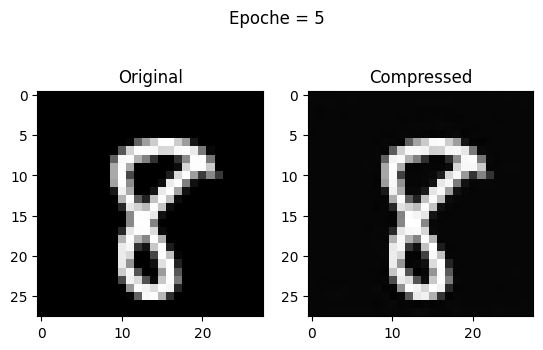


For epoche 5 average loss = 0.0006422428958138315



In [49]:
for epoche in range(epoches):
  totalloss = 0
  cnt = 0
  for img, _ in train_loader:
    img = img.to(device)
    y = model(img)
    loss = criterian(y, img)
    totalloss+=loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    cnt+=1
    if(cnt == last_ele_idx):
      plot(img[0], epoche+1)
  print(f"\nFor epoche {epoche+1} average loss = {totalloss/len(train_loader)}", end = "\n\n")

## Prediction

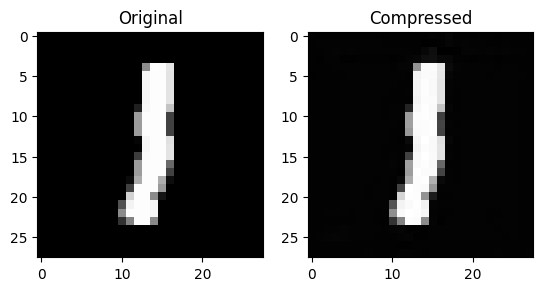

In [50]:
plot(img[0].to(device))

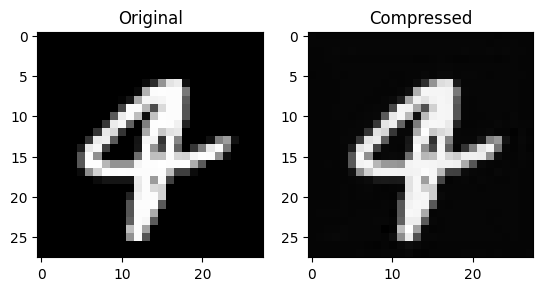

In [51]:
plot(img[1].to(device))